In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, ttest_ind
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv('osteoporosis.csv')

In [3]:
df.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,104866,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,101999,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,106567,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,102316,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,101944,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1


In [4]:
df.describe()

,Id,Age,Osteoporosis
count,1958.000000,1958.000000,1958.000000
mean,105515.320735,39.101124,0.500000
std,2589.407806,21.355424,0.500128
min,101008.000000,18.000000,0.000000
25%,103348.500000,21.000000,0.000000
50%,105469.000000,32.000000,0.500000
75%,107755.000000,53.000000,1.000000
max,109996.000000,90.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

In [6]:
categorical_feats = df.select_dtypes(include=['object']).columns.to_list()

for c in categorical_feats:
    print("*", c, ": " , df[c].unique())

* Gender :  ['Female' 'Male']
* Hormonal Changes :  ['Normal' 'Postmenopausal']
* Family History :  ['Yes' 'No']
* Race/Ethnicity :  ['Asian' 'Caucasian' 'African American']
* Body Weight :  ['Underweight' 'Normal']
* Calcium Intake :  ['Low' 'Adequate']
* Vitamin D Intake :  ['Sufficient' 'Insufficient']
* Physical Activity :  ['Sedentary' 'Active']
* Smoking :  ['Yes' 'No']
* Alcohol Consumption :  ['Moderate' nan]
* Medical Conditions :  ['Rheumatoid Arthritis' nan 'Hyperthyroidism']
* Medications :  ['Corticosteroids' nan]
* Prior Fractures :  ['Yes' 'No']


In [7]:
df.isna().sum()

Id                       0
Age                      0
Gender                   0
Hormonal Changes         0
Family History           0
Race/Ethnicity           0
Body Weight              0
Calcium Intake           0
Vitamin D Intake         0
Physical Activity        0
Smoking                  0
Alcohol Consumption    988
Medical Conditions     647
Medications            985
Prior Fractures          0
Osteoporosis             0
dtype: int64

In [8]:
df.shape

(1958, 16)

<Axes: xlabel='Osteoporosis'>

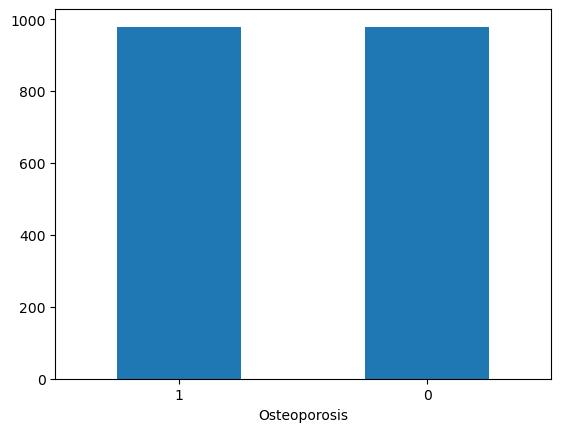

In [9]:
df['Osteoporosis'].value_counts().plot(kind='bar', rot=0)

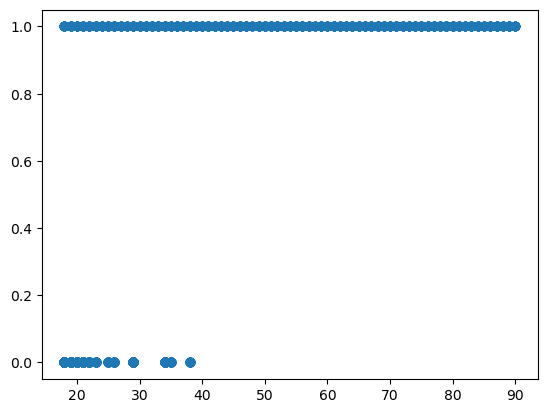

In [10]:
plt.scatter(data=df, x='Age', y='Osteoporosis')
plt.show()

#### Nan values in this context are 'None' so we don't have to drop any values

In [12]:
for col in df.columns:
    if(col != 'Age'):
        csq = chi2_contingency(pd.crosstab(df['Osteoporosis'], df[col]))
        print(col, " p-value: ", csq[1])

Id  p-value:  0.6457002529705155
Gender  p-value:  0.619029042975477
Hormonal Changes  p-value:  0.5268774620813865
Family History  p-value:  0.9639423339315779
Race/Ethnicity  p-value:  0.9460196454260243
Body Weight  p-value:  0.12390243689961927
Calcium Intake  p-value:  0.8921061850507267
Vitamin D Intake  p-value:  0.4693346689383343
Physical Activity  p-value:  0.415460494277902
Smoking  p-value:  0.4977843074823687
Alcohol Consumption  p-value:  1.0
Medical Conditions  p-value:  0.9422259064693396
Medications  p-value:  1.0
Prior Fractures  p-value:  0.5268748748463302
Osteoporosis  p-value:  0.0


In [14]:
df.drop(['Medications', 'Alcohol Consumption', 'Medical Conditions', 'Family History', 'Race/Ethnicity'], axis=1, inplace=True)

In [15]:
df

,Id,Age,Gender,Hormonal Changes,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Prior Fractures,Osteoporosis
0,104866,69,Female,Normal,Underweight,Low,Sufficient,Sedentary,Yes,Yes,1
1,101999,32,Female,Normal,Underweight,Low,Sufficient,Sedentary,No,Yes,1
2,106567,89,Female,Postmenopausal,Normal,Adequate,Sufficient,Active,No,No,1
3,102316,78,Female,Normal,Underweight,Adequate,Insufficient,Sedentary,Yes,No,1
4,101944,38,Male,Postmenopausal,Normal,Low,Sufficient,Active,Yes,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...
1953,106130,19,Female,Normal,Normal,Adequate,Sufficient,Sedentary,Yes,Yes,0
1954,106463,23,Female,Postmenopausal,Underweight,Low,Insufficient,Active,No,No,0
1955,103142,34,Female,Postmenopausal,Underweight,Low,Sufficient,Sedentary,No,No,0
1956,105187,25,Male,Postmenopausal,Normal,Low,Insufficient,Sedentary,Yes,Yes,0


### Performing label encoding on some features

In [16]:
# label_cols = ['Gender', 'Hormonal Changes', 'Family History', 'Body Weight', 'Calcium Intake', 'Vitamin D Intake', 
#                 'Physical Activity', 'Smoking', 'Alcohol Consumption', 'Medications', 'Prior Fractures']

label_cols = ['Gender', 'Hormonal Changes', 'Body Weight', 'Calcium Intake', 'Vitamin D Intake', 
                'Physical Activity', 'Smoking', 'Prior Fractures']

In [17]:
le = LabelEncoder()

for c in label_cols:
    df[c] = le.fit_transform(df[c])

In [18]:
df

,Id,Age,Gender,Hormonal Changes,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Prior Fractures,Osteoporosis
0,104866,69,0,0,1,1,1,1,1,1,1
1,101999,32,0,0,1,1,1,1,0,1,1
2,106567,89,0,1,0,0,1,0,0,0,1
3,102316,78,0,0,1,0,0,1,1,0,1
4,101944,38,1,1,0,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1953,106130,19,0,0,0,0,1,1,1,1,0
1954,106463,23,0,1,1,1,0,0,0,0,0
1955,103142,34,0,1,1,1,1,1,0,0,0
1956,105187,25,1,1,0,1,0,1,1,1,0


In [31]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

column_to_scale = df['Age'].values.reshape(-1, 1)
df['Age'] = ss.fit_transform(column_to_scale)

### Performing One-hot encoding on remaining features

In [19]:
# one_hot_cols=['Race/Ethnicity', 'Medical Conditions']

# df = pd.get_dummies(df, columns=one_hot_cols).astype(int)

In [32]:
X = df.drop(['Id', 'Osteoporosis'], axis=1)
y = df['Osteoporosis']

### Analyzing relationship between variables

### Chi test for categorical variables

### T-test for Age

#### There is a strong correlation between Age and Osteoporosis

In [33]:
age_with_osteoporosis = df[df['Osteoporosis'] == 1]['Age']
age_without_osteoporosis = df[df['Osteoporosis'] == 0]['Age']

result = ttest_ind(age_with_osteoporosis, age_without_osteoporosis, equal_var=False)
print("p-value:", result[1])

p-value: 4.015292508421445e-236


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Testing the performance on one-hot encoded data

In [36]:
y_train.value_counts()

Osteoporosis
0    786
1    780
Name: count, dtype: int64

In [37]:
y_test.value_counts()

Osteoporosis
1    199
0    193
Name: count, dtype: int64

### First let's try some RandomForestClassifier

In [38]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}

In [39]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for Ran

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [40]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [41]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')

In [42]:
rfc1.fit(X_train, y_train)

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=8, max_features='auto', n_estimators=200,
                       random_state=42)

In [43]:
print (f'Train Accuracy - : {rfc1.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rfc1.score(X_test,y_test):.3f}')

Train Accuracy - : 0.906
Test Accuracy - : 0.855


## Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=500)

In [36]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [37]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [38]:
print("Train Accuracy: ", accuracy_score(y_train_pred, y_train))
print("Test Accuracy: ", accuracy_score(y_test_pred, y_test))

Train Accuracy:  0.8301404853128991
Test Accuracy:  0.8086734693877551


In [39]:
print(classification_report(y_test_pred, y_test))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       206
           1       0.78      0.83      0.81       186

    accuracy                           0.81       392
   macro avg       0.81      0.81      0.81       392
weighted avg       0.81      0.81      0.81       392

